In [1]:
import torch
import cv2
import torchvision.transforms as transforms
from unprocess.unprocess import *
from process.process import *
import matplotlib.pyplot as plt
# from PIL import Image
import numpy as np
import os

In [2]:
image = cv2.imread("/home/sougato97/Thesis/datasets/LOLdataset/eval15/high/111.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB color space 

In [3]:
image.shape

(400, 600, 3)

In [4]:
# Define the transform
transform = transforms.ToTensor()  

# Convert the image to tensor
tensor = transform(image)
un_image, metadata = unprocess(tensor)

Add noise to the un_image

In [17]:
# Add noise to the un_image
shot_noise, read_noise = random_noise_levels()
noisy_img = add_noise(un_image, shot_noise, read_noise)

[Group 2, 3] Avoid noise 

In [18]:
un_image.shape

torch.Size([4, 200, 300])

In [7]:
temp_demosaic = torch.clamp(un_image, min=0.0, max=1.0)
# For this demosaic to work, it needs to be a 4D matrix, so expanding
temp_shape = temp_demosaic.size()
temp_demosaic = temp_demosaic.view(1, temp_shape[0], temp_shape[1], temp_shape[2])
temp_demosaic = demosaic(temp_demosaic)
temp_demosaic = temp_demosaic[0]

In [8]:
un_image = temp_demosaic.permute(1, 2, 0)

In [9]:
temp_R=_R = un_image[:,:,0]
temp_G = un_image[:,:,1]
temp_B = un_image[:,:,2]

In [10]:
un_image.shape

torch.Size([400, 600, 3])

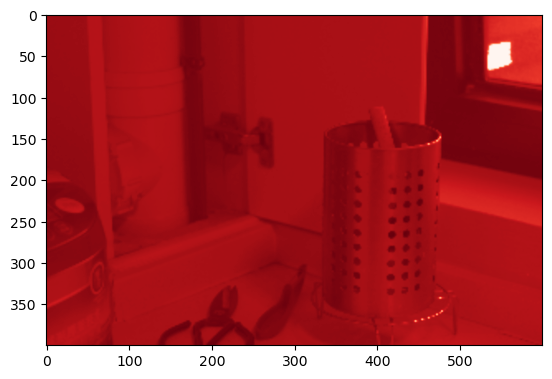

In [11]:
plt.imshow(temp_R, cmap='Reds_r')

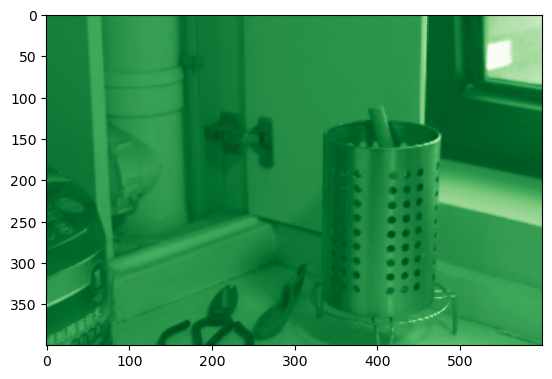

In [12]:
plt.imshow(temp_G, cmap='Greens_r')

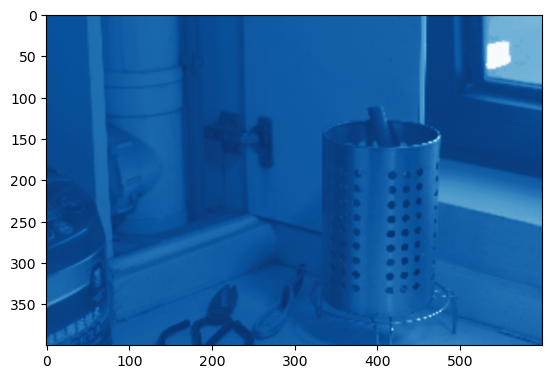

In [13]:
plt.imshow(temp_B, cmap='Blues_r')

In [15]:
noisy_img.shape

torch.Size([4, 200, 300])

[Group 1] For displaying, I am using high value of noise 

In [67]:
def Add_noise(image, shot_noise=0.05, read_noise=0.0005):
  """Adds random shot (proportional to image) and read (independent) noise."""
  image    = image.permute(1, 2, 0) # Permute the image tensor to HxWxC format from CxHxW format
  variance = image * shot_noise + read_noise
  n        = tdist.Normal(loc=torch.zeros_like(variance), scale=torch.sqrt(variance)) 
  noise    = n.sample()
  out      = image + noise
  out      = out.permute(2, 0, 1) # Re-Permute the tensor back to CxHxW format
  return out

In [75]:
disp_noisy_img = Add_noise(un_image, 0.01, read_noise)

In [76]:
disp_noisy_img = disp_noisy_img.permute(1, 2, 0) # Permute the image tensor to HxWxC format from CxHxW format
# disp_noisy_img.shape
# Convert the tensor image to a numpy array
disp_noisy_img = disp_noisy_img.numpy()
disp_noisy_img.shape

(200, 300, 4)

In [77]:
R = disp_noisy_img[:,:,0]
G1 = disp_noisy_img[:,:,1]
G2 = disp_noisy_img[:,:,2]
B = disp_noisy_img[:,:,3]

Displaying the mosaic image (noise + photons hit)

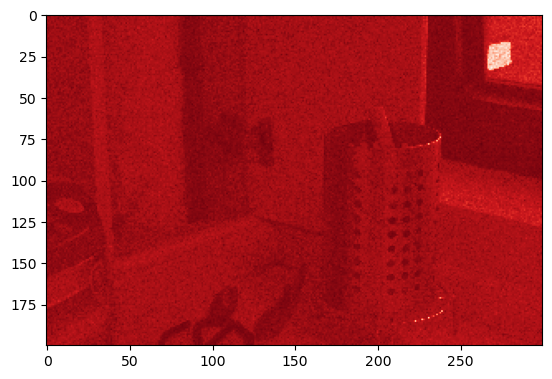

In [78]:
'''
supported values are 
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r',
'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 
'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 
'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 
'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 
'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 
cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r','gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 
'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 
'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 
'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', '
tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
'''
plt.imshow(R, cmap='Reds_r')

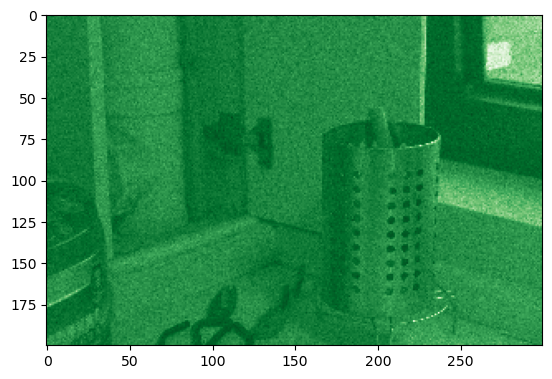

In [79]:
# 'Greens', 'Greens_r'
plt.imshow(G1, cmap='Greens_r')

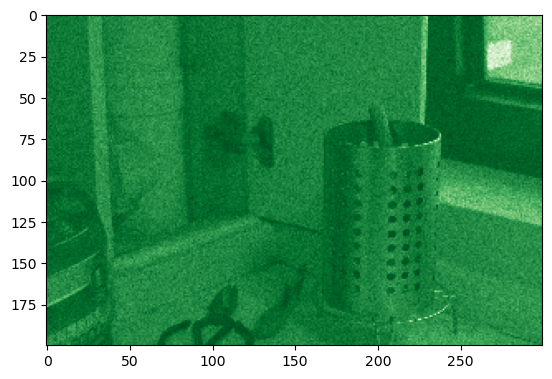

In [80]:
plt.imshow(G2, cmap='Greens_r')

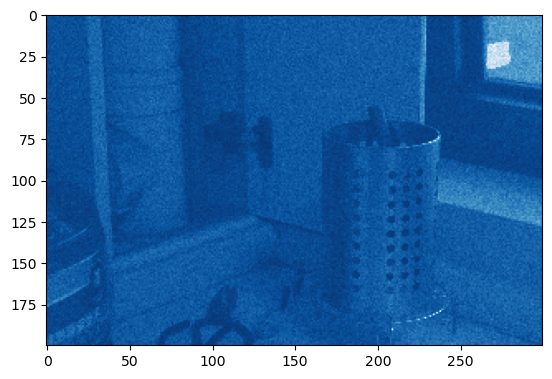

In [81]:
plt.imshow(B, cmap='Blues_r')

Demosaic (convert to RGB)

In [50]:
temp_demosaic = torch.clamp(noisy_img, min=0.0, max=1.0)
# For this demosaic to work, it needs to be a 4D matrix, so expanding
temp_shape = temp_demosaic.size()
temp_demosaic = temp_demosaic.view(1, temp_shape[0], temp_shape[1], temp_shape[2])
temp_demosaic = demosaic(temp_demosaic)
temp_demosaic = temp_demosaic[0]

In [51]:
temp_demosaic.shape

torch.Size([3, 400, 600])

In [52]:
temp_demosaic = temp_demosaic.permute(1, 2, 0) # Permute the image tensor to HxWxC format from CxHxW format
# Convert the tensor image to a numpy array
temp_demosaic = temp_demosaic.numpy()
temp_demosaic.shape

(400, 600, 3)

In [53]:
temp_demosaic_R = temp_demosaic[:,:,0]
temp_demosaic_G = temp_demosaic[:,:,1]
temp_demosaic_B = temp_demosaic[:,:,2]

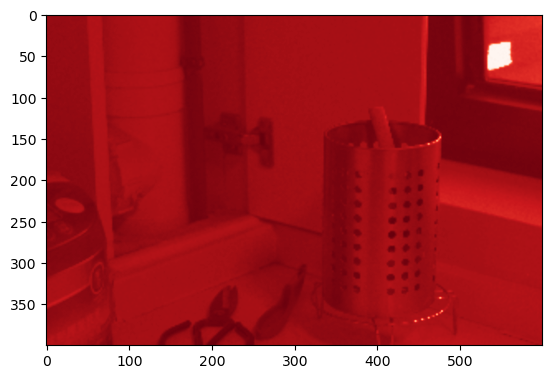

In [54]:
plt.imshow(temp_demosaic_R, cmap='Reds_r')

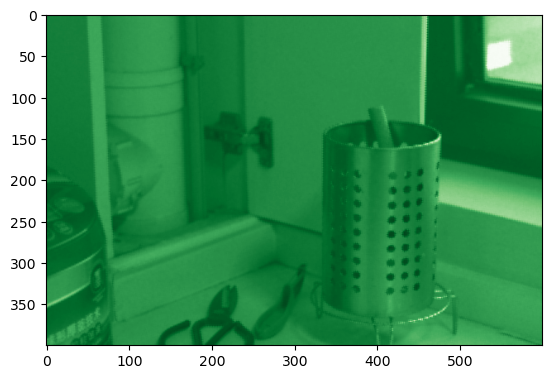

In [55]:
plt.imshow(temp_demosaic_G, cmap='Greens_r')

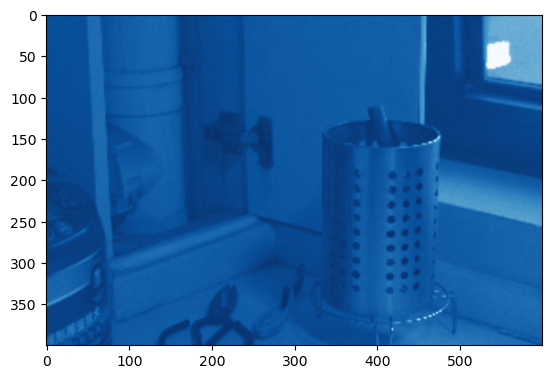

In [56]:
plt.imshow(temp_demosaic_B, cmap='Blues_r')

[Group 4]Apply White Balance, Gains

In [5]:
bayer_image = apply_gains(un_image, metadata['red_gain'],  metadata['blue_gain'])

In [6]:
Gain_image = bayer_image.permute(1, 2, 0) # Permute the image tensor to HxWxC format from CxHxW format
# Convert the tensor image to a numpy array
Gain_image = Gain_image.numpy()
Gain_image.shape

(200, 300, 4)

In [7]:
# Demosaic.
bayer_image = torch.clamp(bayer_image, min=0.0, max=1.0)
# For this demosaic to work, it needs to be a 4D matrix, so expanding
shape = bayer_image.size()
bayer_image = bayer_image.view(1, shape[0], shape[1], shape[2])
gain_image = demosaic(bayer_image)

In [8]:
disp_gain_image = gain_image[0]
disp_gain_image = disp_gain_image.permute(1, 2, 0) # Permute the image tensor to HxWxC format from CxHxW format
# Convert the tensor image to a numpy array
disp_gain_image = disp_gain_image.numpy()
disp_gain_image.shape

(400, 600, 3)

In [9]:
gain_R = disp_gain_image[:,:,0]
gain_G = disp_gain_image[:,:,1]
gain_B = disp_gain_image[:,:,2]

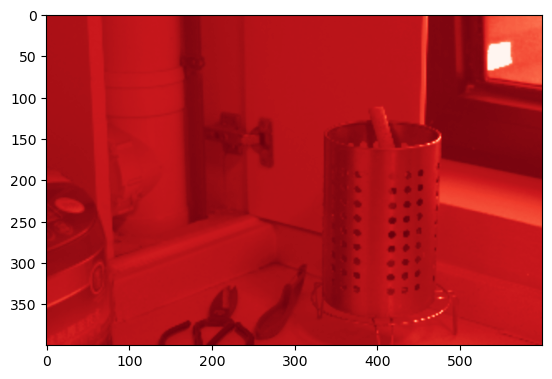

In [10]:
plt.imshow(gain_R, cmap='Reds_r')

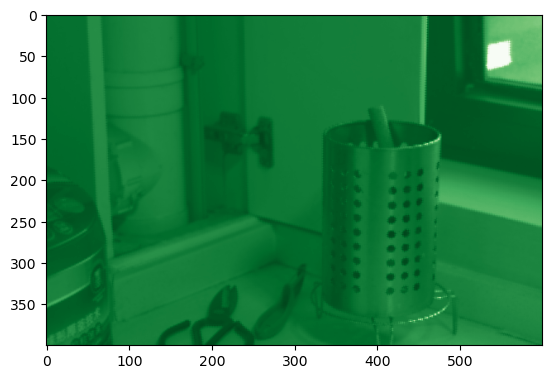

In [11]:
plt.imshow(gain_G, cmap='Greens_r')

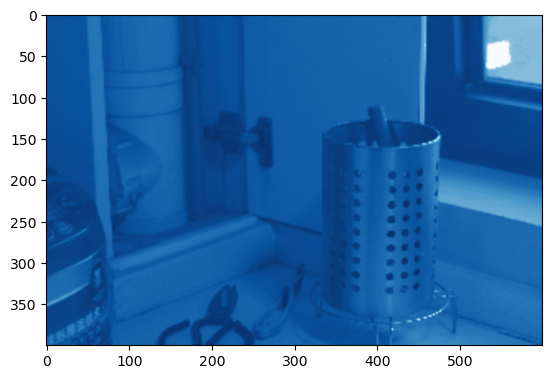

In [12]:
plt.imshow(gain_B, cmap='Blues_r')

[Group 5] Color Correction

In [13]:
color_corrected_image = apply_ccm(gain_image[0], metadata['cam2rgb'])

In [14]:
disp_color_corrected_image = color_corrected_image.permute(1, 2, 0) # Permute the image tensor to HxWxC format from CxHxW format
# Convert the tensor image to a numpy array
disp_color_corrected_image = disp_color_corrected_image.numpy()
disp_color_corrected_image.shape

(400, 600, 3)

In [15]:
color_corrected_R = disp_color_corrected_image[:,:,0]
color_corrected_G = disp_color_corrected_image[:,:,1]
color_corrected_B = disp_color_corrected_image[:,:,2]

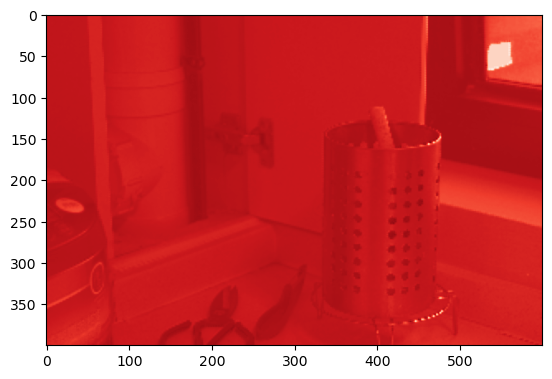

In [16]:
plt.imshow(color_corrected_R, cmap='Reds_r')

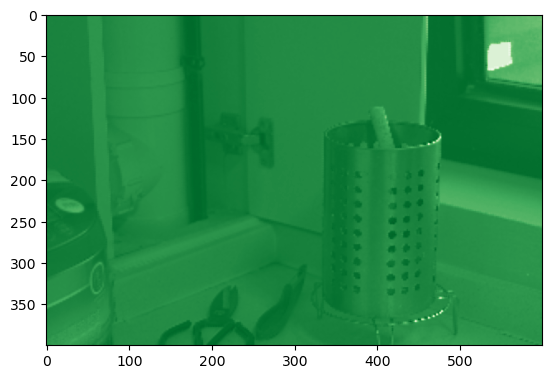

In [17]:
plt.imshow(color_corrected_R, cmap='Greens_r')

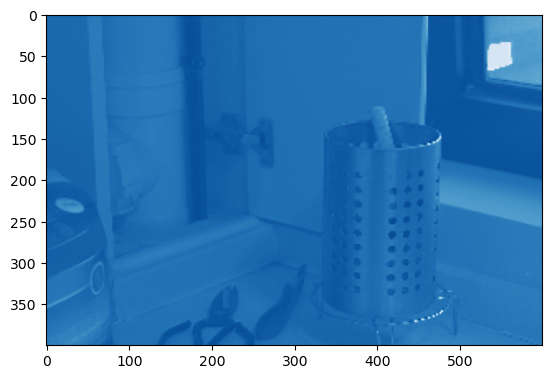

In [18]:
plt.imshow(color_corrected_R, cmap='Blues_r')

[Group 6] Gamma Correction, Tone Mapping(optional)

In [20]:
sRGB = torch.clamp(color_corrected_image, min=0.0, max=1.0)
sRGB = gamma_compression(sRGB)
disp_sRGB = sRGB.permute(1, 2, 0) # Permute the image tensor to HxWxC format from CxHxW format
# Convert the tensor image to a numpy array
disp_sRGB = disp_sRGB.numpy()
disp_sRGB.shape

(400, 600, 3)

In [21]:
disp_sRGB_R = disp_sRGB[:,:,0]
disp_sRGB_G = disp_sRGB[:,:,1]
disp_sRGB_B = disp_sRGB[:,:,2]

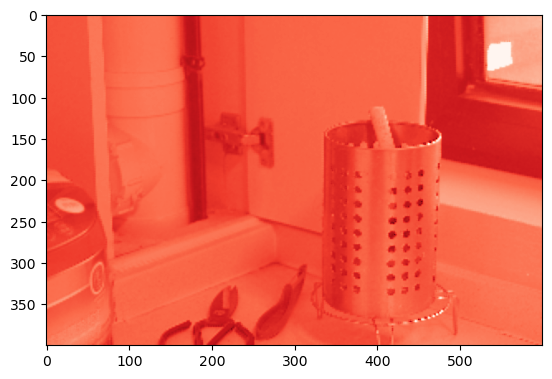

In [22]:
plt.imshow(disp_sRGB_R, cmap='Reds_r')

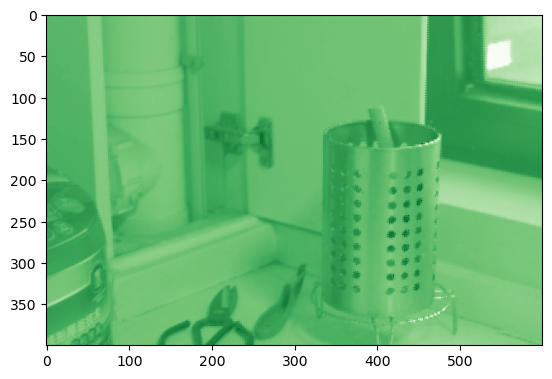

In [23]:
plt.imshow(disp_sRGB_G, cmap='Greens_r')

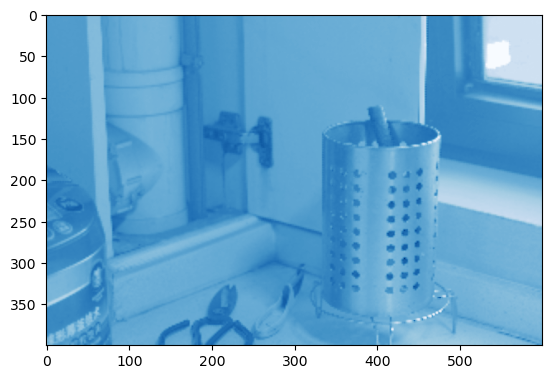

In [24]:
plt.imshow(disp_sRGB_B, cmap='Blues_r')

Display the sRGB image

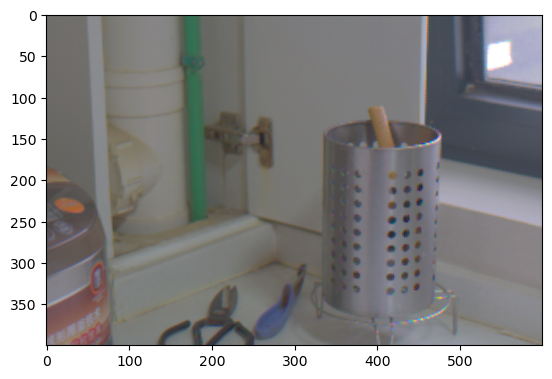

In [25]:
plt.imshow(disp_sRGB)